## HW3：函数极值与矩阵分解（ddl：10.19）
你的名字：寇皓

你的学号：2300011467


注意：
1. 请使用 Python 语言完成所有编程作业。
2. 允许并鼓励同学间合作，但严禁抄袭别人的代码，且严禁直接复制粘贴由人工智能生成的代码。
3. 请直接在题干后附加代码块和必要的公式，讨论等。
4. 作图请包含 X,Y 轴的标签，以及必要的图例。过多信息的缺失可能会导致丢分。

作业只需要在这个 jupyter notebook 里添加代码，并直接提交修改后的 jupyter notebook，文件请重命名为`姓名-学号-作业x`。

另外请在作业最后**简要说明本次作业完成情况**，以及大致心路历程；另外标注**致谢**，借助了**哪位同学或 ChatGPT 等工具**的帮助，如果自己独立完成的，只需标注"独立完成"。如果上述备注有缺失，会导致作业扣分！


### 1.函数优化

<font color='red'>**本题(a)问中禁止调用现成的函数优化/方程求根工具**</font>

在这道题里，你需要用课上学习的最速下降法和共轭梯度法来做一些优化。

**(a)** 我们考察如下二元函数：
$$f(x,y)=x^2+12y^2+3xy+7x+15y$$

* 请从初猜$(0, 0)$开始，参考讲义中的最速下降法进行迭代优化（其中一维线搜索统一采用黄金分割搜索法，参数设置只需确保$f(x,y)$迭代收敛即可），迭代至下一步函数值减小降至$10^{-5}$以内即停止，请用列表记录下迭代过程中每一步的$(x,y)$值，并输出迭代停止时的最终结果。



In [1]:
import numpy
import matplotlib.pyplot as plot


f1 = lambda x, y: numpy.power(x, 2) + 12 * numpy.power(y, 2) + 3 * x * y + 7 * x + 15 * y


def gradient(f, x, y, delta=1e-8):
    fx = (f(x + delta, y) - f(x - delta, y)) / (2 * delta)
    fy = (f(x, y + delta) - f(x, y - delta)) / (2 * delta)
    return numpy.array([fx, fy])


def steepest_descent(f, x0, y0, epsilon=1e-5):
    xmin = x0
    ymin = y0
    xlist = [x0]
    ylist = [y0]
    value = f(xmin, ymin)
    value_new = value + 2 * epsilon
    while abs(value_new - value) >= epsilon:
        p = -gradient(f, xmin, ymin)
        g = lambda alpha: f(xmin + alpha * p[0], ymin + alpha * p[1])

        alpha_min = 0
        alpha_mid = 1e-5
        while True:
            if g(alpha_mid * 1.618) < g(alpha_mid):
                alpha_mid = alpha_mid * 1.618
            else:
                break
        alpha_max = alpha_mid * 1.618

        while min(g(alpha_max), g(alpha_min)) - g(alpha_mid) > epsilon:
            alpha_try = alpha_max - alpha_mid + alpha_min
            if g(alpha_try) <= g(alpha_mid):
                if alpha_try < alpha_mid:
                    alpha_max = alpha_mid
                    alpha_mid = alpha_try
                else:
                    alpha_min = alpha_mid
                    alpha_mid = alpha_try
            else:
                if alpha_try < alpha_mid:
                    alpha_min = alpha_try
                else:
                    alpha_max = alpha_try
        xmin = xmin + alpha_mid * p[0]
        ymin = ymin + alpha_mid * p[1]
        value = value_new
        value_new = f(xmin, ymin)
        xlist.append(xmin)
        ylist.append(ymin)
    return (xlist, ylist, xmin, ymin)


f1_steepest_xlist, f1_steepest_ylist, f1_steepest_xmin, f1_steepest_ymin = steepest_descent(f1, 0, 0, 1e-8)
print(f1_steepest_xmin, f1_steepest_ymin)


-3.153870577781188 -0.23076728226499685


* 改用共轭梯度法，且按照第二章讲义P27第三段介绍的方法来设置步长（注意讲义中此处求得的应为$\alpha_k$），其余条件保持不变，再对$f(x,y)$进行迭代优化，同样要记录下迭代过程中每一步的$(x,y)$值且输出最终结果。

In [2]:
def hessian(f, x, y, delta=1e-5):
    fxx = (f(x + delta, y) + f(x - delta, y) - 2 * f(x, y)) / (delta**2)
    fyy = (f(x, y + delta) + f(x, y - delta) - 2 * f(x, y)) / (delta**2)
    fxy = (f(x + delta, y + delta) + f(x - delta, y - delta) - f(x + delta, y - delta) - f(x - delta, y + delta)) / (4 * delta**2)
    fyx = fxy
    return numpy.array([[fxx, fxy], [fyx, fyy]])


def conjugate_gradient(f, x0, y0, epsilon=1e-5):
    xmin = x0
    ymin = y0
    xlist = [x0]
    ylist = [y0]
    value = f(xmin, ymin)
    value_new = value + 2 * epsilon
    r_old = -gradient(f, xmin, ymin)
    p_old = r_old
    while abs(value_new - value) >= epsilon:
        alpha = (r_old @ r_old) / (p_old @ (hessian(f, xmin, ymin) @ p_old))
        xmin = xmin + alpha * p_old[0]
        ymin = ymin + alpha * p_old[1]
        r = -gradient(f, xmin, ymin)
        beta = beta = (r @ r) / (r_old @ r_old)
        p = r + beta * p_old
        r_old = r
        p_old = p
        value = value_new
        value_new = f(xmin, ymin)
        xlist.append(xmin)
        ylist.append(ymin)
    return (xlist, ylist, xmin, ymin)


f1_conj_xlist, f1_conj_ylist, f1_conj_xmin, f1_conj_ymin = conjugate_gradient(f1, 0, 0, 1e-8)
print(f1_conj_xmin, f1_conj_ymin)


-3.153845522487263 -0.23076935410472127


* 画出$f(x,y)$的热力图或等高线图（用`matplotlib.pyplot`中的`contour`或`contourf`），然后在图上用两种颜色画出两种方法的迭代路线，并对这一结果进行**讨论**。

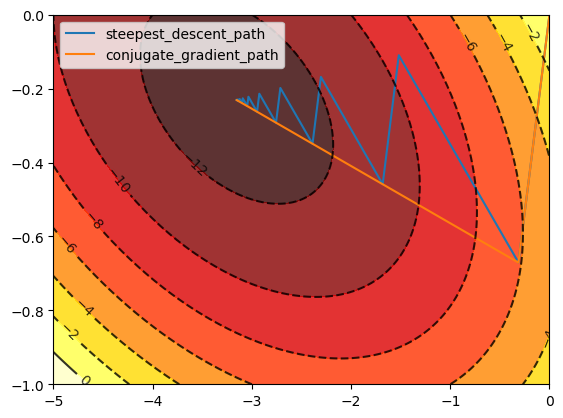

In [3]:
lattice = 2**10
x = numpy.linspace(-5, 0, lattice)
y = numpy.linspace(-1, 0, lattice)
X, Y = numpy.meshgrid(x, y)
plot.plot(f1_steepest_xlist, f1_steepest_ylist, label='steepest_descent_path')
plot.plot(f1_conj_xlist, f1_conj_ylist, label='conjugate_gradient_path')
plot.contourf(X, Y, f1(X, Y), 8, alpha=0.8, cmap=plot.cm.hot)
C = plot.contour(X, Y, f1(X, Y), 8, alpha=0.8, colors='black')
plot.clabel(C, inline=True, fontsize=10)
plot.legend()
plot.show()


<div style="border: 2px solid black; padding: 10px;">
共轭梯度下降算法在寻找极值过程中的路径比最速梯度要平直，没有来回往复的锯齿路径。这说明共轭梯度的算法较好地利用到了前一次迭代的信息，有更好的适应性。
</div>

**注意：接下来的(b)(c)(d)问都是附加题，做了加分，不做不扣分。**

（请要做附加题的同学自行添加cell，注意**要以注释标明你添加的cell对应于(b)(c)(d)中的哪一问**）

**Bonus (b)** 你可能会发现共轭梯度法的效果十分拔群（或许会试出来二者表现差不多的情况，只能说明你运气不错，不要忘了实际运用中最速下降法的步长选取任意性很大），但很遗憾：并不是所有的函数都是这么美丽的二次型；对于很多比较病态的函数，如果不对优化算法进行改进，共轭梯度反而会导致灾难性的结果。

举个例子：**Rosenbrock's Banana Function**：https://en.wikipedia.org/wiki/Rosenbrock_function
$$ f(x,y)=(x-1)^2 + 100(y-x^2)^2 $$
它的全局最小值位于$(1,1)$，此处$f(1,1)=0$，但在其周围的一个弧形范围内数值变化微乎其微，难以通过你在上面使用的步长取法进行处理。对于搜索方向$\hat p_k$，每步搜索的'步长'$\alpha_k$是必须人为选取的参数，也就是机器学习领域中常说的“学习率”：
$$
\vec{x}_{k+1}=\vec{x}_k + \alpha_k \vec p_k 
$$

请仍然从初猜$(0, 0)$开始，取不同数量级的常数学习率$\alpha$(在优化过程中不改变)，用最速梯度和共轭梯度进行迭代优化，作图讨论你观察到的现象。

（提示：函数值迭代到$10^{-4}$就可以算收敛；可以讨论两种算法下收敛性与迭代步数受学习率的影响）

**Bonus (c)** 上面的尝试中共轭梯度法的表现可能有亿点拉跨，但实际上学习率$\alpha$随着优化的进行应当也有动态的调整。

`scipy`库中的优化工具就能做到这一点，请尝试调用`scipy.optimize.minimize`来完成此函数的优化，其中优化算法设为`Newton-CG`。并与你此前的尝试进行比较。感兴趣的话，除了设置`'disp': True`而导出的输出外，你还可以借助参数`callback`来导出迭代路径等信息。（通过这一对比，你应该能体会到在科研实践中学会熟练调包相比一言不合就手搓轮子的优越之处）

**Bonus (d)** 通过查阅一些相关资料，你能否提出一种对于 **(b)** 问中所用算法的改良思路？请畅所欲言。

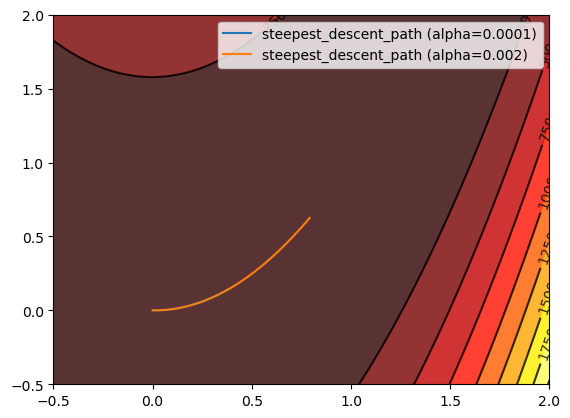

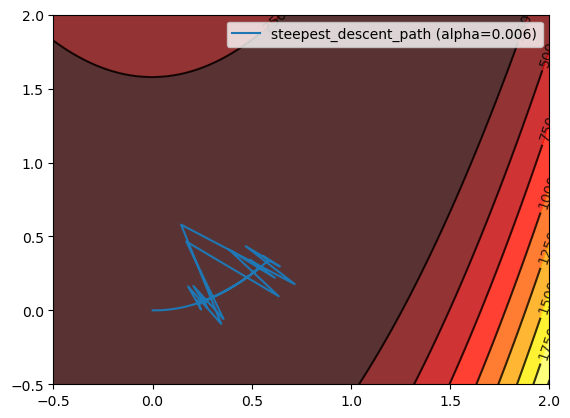

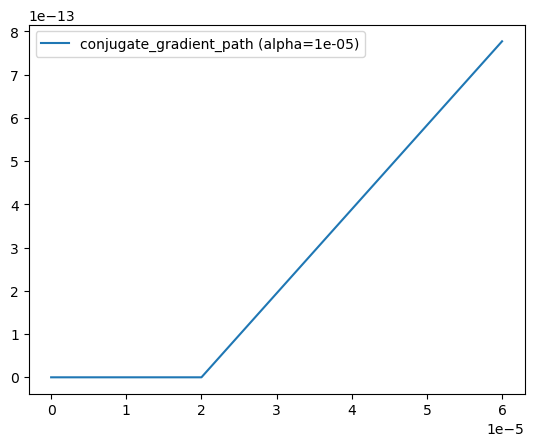

C:\Users\kouha\AppData\Local\Temp\ipykernel_64784\3903143115.py:38: RuntimeWarning: invalid value encountered in scalar divide
  beta = beta = (r @ r) / (r_old @ r_old)


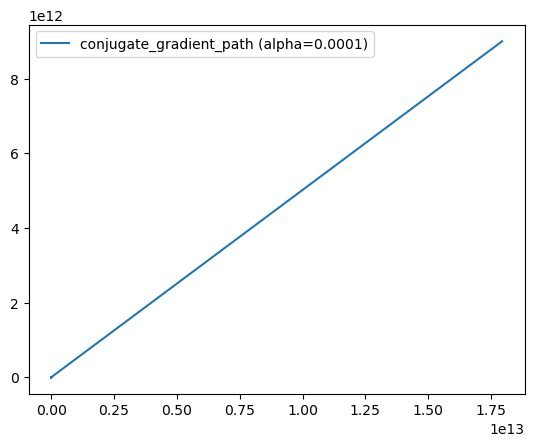

In [4]:
# question b

f2 = lambda x, y: numpy.power(x - 1, 2) + 100 * numpy.power(y - numpy.power(x, 2), 2)


def steepest_descent_fixrate(f, x0, y0, epsilon=1e-5, alpha=1e-1):
    xmin = x0
    ymin = y0
    xlist = [x0]
    ylist = [y0]
    value = f(xmin, ymin)
    value_new = value + 2 * epsilon
    while abs(value_new - value) >= epsilon:
        p = -gradient(f, xmin, ymin)
        g = lambda alpha: f(xmin + alpha * p[0], ymin + alpha * p[1])
        xmin = xmin + alpha * p[0]
        ymin = ymin + alpha * p[1]
        value = value_new
        value_new = f(xmin, ymin)
        xlist.append(xmin)
        ylist.append(ymin)
    return (xlist, ylist, xmin, ymin)


def conjugate_gradient_fixrate(f, x0, y0, epsilon=1e-5, alpha=1e-1):
    xmin = x0
    ymin = y0
    xlist = [x0]
    ylist = [y0]
    value = f(xmin, ymin)
    value_new = value + 2 * epsilon
    r_old = -gradient(f, xmin, ymin)
    p_old = r_old
    while abs(value_new - value) >= epsilon:
        xmin = xmin + alpha * p_old[0]
        ymin = ymin + alpha * p_old[1]
        r = -gradient(f, xmin, ymin)
        beta = beta = (r @ r) / (r_old @ r_old)
        p = r + beta * p_old
        r_old = r
        p_old = p
        value = value_new
        value_new = f(xmin, ymin)
        xlist.append(xmin)
        ylist.append(ymin)
    return (xlist, ylist, xmin, ymin)


def draw_contour_f2():
    lattice = 2**10
    x = numpy.linspace(-0.5, 2, lattice)
    y = numpy.linspace(-0.5, 2, lattice)
    X, Y = numpy.meshgrid(x, y)
    plot.contourf(X, Y, f2(X, Y), 8, alpha=0.8, cmap=plot.cm.hot)
    C = plot.contour(X, Y, f2(X, Y), 8, alpha=0.8, colors='black')
    plot.clabel(C, inline=True, fontsize=10)


draw_contour_f2()
for rate in [0.0001, 0.002]:
    f2_steepest_xlist, f2_steepest_ylist, f2_steepest_xmin, f2_steepest_ymin = steepest_descent_fixrate(f2, 0, 0, 1e-4, rate)
    plot.plot(f2_steepest_xlist, f2_steepest_ylist, label=f'steepest_descent_path (alpha={rate})')
plot.legend()
plot.show()

draw_contour_f2()
rate = 0.006
f2_steepest_xlist, f2_steepest_ylist, f2_steepest_xmin, f2_steepest_ymin = steepest_descent_fixrate(f2, 0, 0, 1e-4, rate)
plot.plot(f2_steepest_xlist, f2_steepest_ylist, label=f'steepest_descent_path (alpha={rate})')
plot.legend()
plot.show()


rate = 0.00001
f2_conj_xlist, f2_conj_ylist, f2_conj_xmin, f2_conj_ymin = conjugate_gradient_fixrate(f2, 0, 0, 1e-4, rate)
plot.plot(f2_conj_xlist, f2_conj_ylist, label=f'conjugate_gradient_path (alpha={rate})')
plot.legend()
plot.show()

rate = 0.0001
f2_conj_xlist, f2_conj_ylist, f2_conj_xmin, f2_conj_ymin = conjugate_gradient_fixrate(f2, 0, 0, 1e-4, rate)
plot.plot(f2_conj_xlist, f2_conj_ylist, label=f'conjugate_gradient_path (alpha={rate})')
plot.legend()
plot.show()


<div style="border: 2px solid black; padding: 10px;">
最速梯度在这个函数下的表现不如(a)问，在非常小的学习率下才能勉强完成优化。如果学习率较高，路径步长过大，会导致难以找到极值位置，且搜索路径不够直接。而共轭梯度的表现则很差，不能完成优化：学习率很小时，设置较大的收敛判定阈值会导致算法快速结束，设置较小的收敛判定阈值会导致算法不收敛（或梯度太小，算出的系数超级大）；学习率较大时算法直接不收敛。最后一张图的路径甚至涉及了$10^{13}$大小的路径。
</div>

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 54
         Gradient evaluations: 152
         Hessian evaluations: 0
[1.00000003 1.00000005]


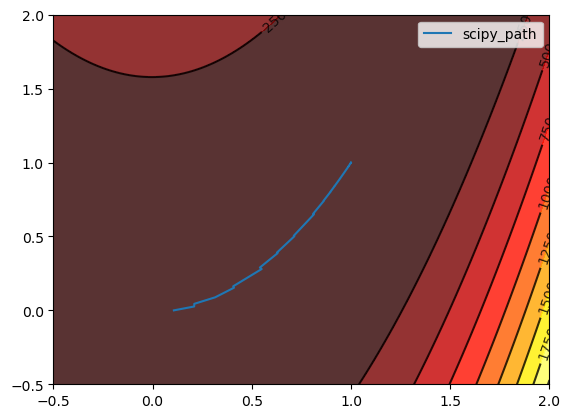

In [5]:
# question c

import scipy

def record_path(point):
    path.append(point.copy())


f2_vec = lambda x: numpy.power(x[0] - 1, 2) + 100 * numpy.power(x[1] - numpy.power(x[0], 2), 2)
f2_start = numpy.array([0.0, 0.0])
path = []
df2 = lambda x: gradient(f2, x[0], x[1])
f2_result = scipy.optimize.minimize(f2_vec, f2_start, method='Newton-CG', jac=df2, callback=record_path, options={'disp': True})
print(f2_result.x)
draw_contour_f2()
path = numpy.array(path)
plot.plot(path[:, 0], path[:, 1], label=f'scipy_path')
plot.legend()
plot.show()


<div style="border: 2px solid black; padding: 10px;">
# question d

我们在b问中的算法固定了学习率，这是不够明智的，当函数变化微弱时，算法难以找到极值或效率极低。在互联网上搜索相关资料，我找到了Armjio条件，其基本思想是选择一个步长使得函数有足够的减小，即满足$f(x_k+\alpha p_k)\leq f(x_k)+c_1\alpha\nabla f_k^T p_k,c_1\in (0,1)$。在此基础上还有Wolfe条件，其要求每一次的步长都足够理想，终点的函数斜率（投影值）较小，即$p_k^T\nabla f(x_k+\alpha p_k)\geq c_2p_k^T\nabla f(x_k),c_2\in(c_1,1)$。

这之后就可以通过简单的乘法来迭代$\alpha$的值，直到找到一个理想的$\alpha$值。

参考资料：https://zhuanlan.zhihu.com/p/590013413
</div>

### 2.二维弹性薄膜的矩阵分解分析
<font color='red'>**本题禁止调用矩阵分解或方程组求解相关的包**</font>

**物理背景:**

我们现在考虑一个由 $N \times N$ 个质点构成的二维正方形网格，模拟一个弹性薄膜（比如鼓面）。每个质点的质量为 $m$，它们之间由劲度系数为 $k$ 的弹簧沿网格线（水平和竖直方向）相连。薄膜的四个边界被牢牢固定。

我们只考虑垂直于纸面（$z$方向）的位移。令 $u_{i,j}$ 为位于第 $i$ 行、第 $j$ 列的质点偏离其平衡位置（$z=0$平面）的位移。根据胡克定律，作用在质点 $(i,j)$ 上的净恢复力为：

$F_{i,j} = k(u_{i+1,j} - u_{i,j}) + k(u_{i-1,j} - u_{i,j}) + k(u_{i,j+1} - u_{i,j}) + k(u_{i,j-1} - u_{i,j})$

边界条件为所有边界点的位移为零，即 $u_{0,j} = u_{N+1,j} = u_{i,0} = u_{i,N+1} = 0$ 对所有 $i,j=1,\dots,N$ 成立。
#### **1.建立二维系统的矩阵模型**

在二维问题中，第一步是如何将二维的物理坐标 $(i,j)$ 映射到一个一维的矩阵索引 $p$。我们采用一种标准的“行优先”或“光栅扫描”的映射方式：
$p(i,j) = (i-1)N + j$  （其中 $i,j$ 从1到$N$，索引 $p$ 从1到$N^2$）

在这种映射下，一个包含所有位移的向量 $\mathbf{u}$ 将是一个长度为 $N^2$ 的列向量。当我们在薄膜上施加一组垂直力 $f_{i,j}$ 时，系统的静态平衡方程可以写为 $\mathbf{A}\mathbf{u} = \mathbf{b}$。请写一个函数构建这个 $N^2 \times N^2$ 的刚度矩阵 $\mathbf{A}$。取 $N=5$ ，请使用任意绘图方式（热图，散点图，网格图等）将这个矩阵可视化，能够分辨非零元素的分布特征即可。请描述这个矩阵 $\mathbf{A}$ 有什么性质？（对称性、稀疏性等）


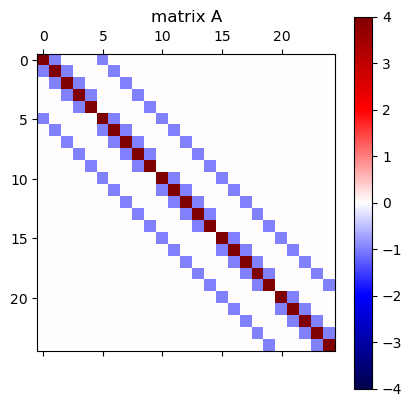

In [6]:
def construct_A(N, k):
    index = lambda i, j: i * N + j
    A = numpy.zeros([numpy.power(N, 2), numpy.power(N, 2)])
    for i in range(numpy.power(N, 2)):
        A[i, i] = 4 * k
    for i in range(N):
        for j in range(N):
            if i > 0:
                A[index(i - 1, j), index(i, j)] = -k
                A[index(i, j), index(i - 1, j)] = -k
            if j > 0:
                A[index(i, j - 1), index(i, j)] = -k
                A[index(i, j), index(i, j - 1)] = -k
            if i < N - 1:
                A[index(i + 1, j), index(i, j)] = -k
                A[index(i, j), index(i + 1, j)] = -k
            if j < N - 1:
                A[index(i, j + 1), index(i, j)] = -k
                A[index(i, j), index(i, j + 1)] = -k
    return A


A = construct_A(5, 1)
max = numpy.abs(A).max()
plot.matshow(A, cmap='seismic', vmin=-max, vmax=max)
plot.title("matrix A")
plot.colorbar()
plot.show()


<div style="border: 2px solid black; padding: 10px;">
这个矩阵A是对称矩阵，并且元素非常稀疏。
</div>

#### **2.利用LU分解求解薄膜的静态凹陷**

现在我们来求解当薄膜被“戳”一下时的响应。

a) **编程实现：** 编写一个LU分解程序（包含前向和后向替换求解器），它可以处理任意方阵。

b) **应用与分析：** 设定 $N=10$ (即总共有 $10 \times 10 = 100$ 个自由质点)，$k=1$。假设我们在薄膜的正中心的四个质点（$2\times2$）分别施加一个单位的向下的力。据此建立力向量 $\mathbf{b}$。利用你实现的LU求解器，计算出所有质点的平衡位移 $\mathbf{u}$。

c) **结果可视化与物理讨论：** 将一维的解向量 $\mathbf{u}$ 重新映射回二维网格，并使用3D曲面图（surface plot）画出薄膜的凹陷形状。从物理上解释这个形状的合理性。（可以使用`surf = ax.plot_surface(X, Y, u_2d, cmap='viridis')`来绘制曲面图）

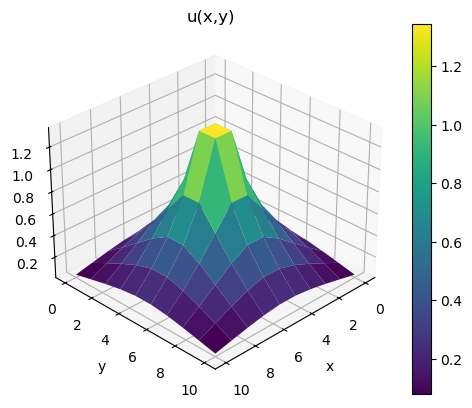

In [7]:
def LU_decompose(A: numpy.ndarray):
    dim = A.shape[0]
    P = numpy.zeros([dim - 1, dim, dim])
    G = numpy.zeros([dim - 1, dim, dim])
    for i in range(dim - 1):
        max = abs(A[0, i])
        index = i
        for j in range(i + 1, dim):
            if abs(A[j, i]) > max:
                index = j
                max = abs(A[j, i])
        P[i] = numpy.eye(dim)
        if index != i:
            P[i, index, index] = 0
            P[i, i, i] = 0
            P[i, index, i] = 1
            P[i, i, index] = 1
        A = P[i] @ A
        for j in range(i + 1, dim):
            G[i, j, i] = -A[j, i] / A[i, i]
        A = (numpy.eye(dim) + G[i]) @ A
    U = A
    L = numpy.eye(dim)
    for i in range(dim - 1):
        L = (numpy.eye(dim) - G[dim - i - 2]) @ L
        L = P[dim - i - 2] @ L
    P_tot = numpy.eye(dim)
    for i in range(dim - 1):
        L = P[i] @ L
        P_tot = P[i] @ P_tot

    return (L, U, P_tot)


def forward_sol(L: numpy.ndarray, b: numpy.ndarray):
    dim = b.size
    solution = numpy.zeros(dim)
    solution[0] = b[0] / L[0, 0]
    for i in range(1, dim):
        rhs = b[i]
        for j in range(0, i):
            rhs -= L[i, j] * solution[j]
        solution[i] = rhs / L[i, i]
    return solution


def backward_sol(U: numpy.ndarray, b: numpy.ndarray):
    dim = b.size
    solution = numpy.zeros(dim)
    solution[dim - 1] = b[dim - 1] / U[dim - 1, dim - 1]
    for i in range(dim - 2, -1, -1):
        rhs = b[i]
        for j in range(i + 1, dim):
            rhs -= U[i, j] * solution[j]
        solution[i] = rhs / U[i, i]
    return solution


N = 10
A = construct_A(N, 1)
b = numpy.zeros(N * N)
b[44] = b[45] = b[54] = b[55] = 1

L, U, P = LU_decompose(A)
solution = backward_sol(U, forward_sol(L, P @ b))
x = numpy.linspace(0, N, N)
y = numpy.linspace(0, N, N)
X, Y = numpy.meshgrid(x, y)

fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, solution.reshape([N, N]), cmap='viridis')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("u(x,y)")
ax.view_init(azim=45)
fig.colorbar(surf)
fig.subplots_adjust(left=0.2)
plot.show()


<div style="border: 2px solid black; padding: 10px;">
薄膜的平衡位移是从中间到两边逐渐减小的，这对应了仅在中间四个格点上施加力。而其他地方的位移则是由相邻薄膜的牵拉造成的，从施力点到周围点的位移是逐渐减小的。这在物理上是合理的。
</div>

#### **3.稀疏性分析**

请回顾你在上一问中的计算过程和得到的结果，回答以下问题：

a)
在问题一中，你观察到刚度矩阵  $\mathbf{A}$ 是一个稀疏矩阵，请你回顾问题二中生成的  $\mathbf{L}$,  $\mathbf{U}$ ，对比原矩阵  $\mathbf{A}$，它的分解因子（  $\mathbf{L}$ 和  $\mathbf{U}$）还是同样稀疏吗？

b) 
通常在分解过程中，在原来是零元素的位置上可能会出现非零元素，这一现象被称为填充。这个填充现象对于我们使用直接分解法（如LU或Cholesky）求解大规模物理问题时，在计算复杂度和内存需求上，给我们带来了什么挑战？

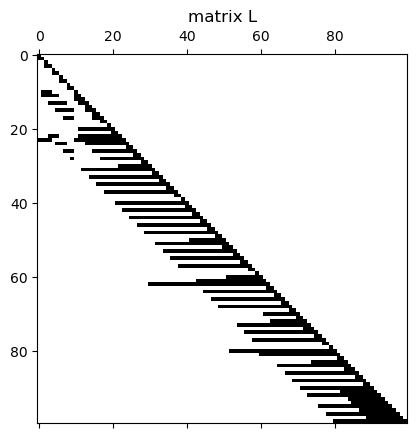

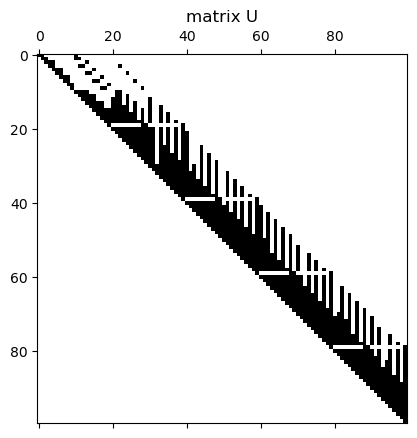

In [8]:
plot.spy(numpy.abs(L) > 1e-9)
plot.title("matrix L")
plot.show()

plot.spy(numpy.abs(U) > 1e-9)
plot.title("matrix U")
plot.show()


<div style="border: 2px solid black; padding: 10px;">
L和U虽然填充不是很密集，但是相比原矩阵来说，稠密了很多（从少许斜线到可观的带）。在计算复杂度上，LU分解求解方程组本身的复杂度是$O(n^3)$，
在求解稀疏矩阵时，会额外在填充和之后对填充的处理中浪费时间。原则上稀疏矩阵应当有更好的做法，其复杂度应当与非0元素数量相关，而不是与整个矩阵的大小相关。
在存储时，LU分解会带来大量的数据，这对内存的要求是$O(n^2)$量级，不利于求解大规模的物理问题。
</div>



#### **4.利用Cholesky分解分析系统能量（选做）**
**本问为附加题，做了加分，不做不扣分。**

二维薄膜系统的弹性势能同样可以表示为 $E_p = \frac{1}{2}\mathbf{u}^T \mathbf{A} \mathbf{u}$。刚度矩阵 $\mathbf{A}$ 依然是对称正定的。

a) **编程实现：** 编写一个函数，对矩阵 $\mathbf{A}$ 进行Cholesky分解 ($\mathbf{A} = \mathbf{L}\mathbf{L}^T$)。

b) **能量计算与验证：** 利用问题二(b)中求得的位移向量 $\mathbf{u}$ 和你得到的Cholesky因子 $\mathbf{L}$，计算变换后的向量 $\mathbf{y} = \mathbf{L}^T \mathbf{u}$。在一张图上绘制$\mathbf{y}$和$\mathbf{u}$的大小随 $p$ 的分布。通过计算验证 $E_p = \frac{1}{2} \mathbf{u}^T \mathbf{A} \mathbf{u}$ 是否等于 $\frac{1}{2}\mathbf{y}^T\mathbf{y}$。

c) **物理意义讨论：** Cholesky分解在这里实现了一种坐标变换。请讨论在这个二维模型中，将耦合的物理坐标 $\mathbf{u}$ 变换为解耦的能量坐标 $\mathbf{y}$ 的意义。





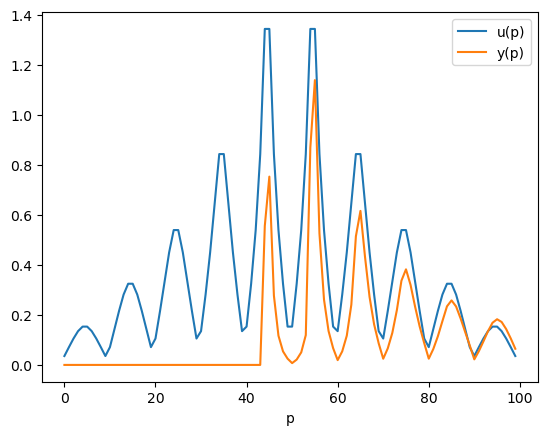

y^T·y/2 = 2.6848475409653756
u^T·A·u/2 = 2.6848475409653765


In [9]:
def cholesky_decompose(A: numpy.ndarray):
    dim = A.shape[0]
    H = numpy.zeros(A.shape)
    H[0, 0] = numpy.sqrt(A[0, 0])
    for i in range(1, dim):
        for j in range(0, i):
            s = A[i, j]
            for k in range(0, j):
                s -= H[i, k] * H[j, k]
            H[i, j] = s / H[j, j]
        H[i, i] = numpy.sqrt(A[i, i] - numpy.power(H[i, 0:i], 2).sum())
    return H


L = cholesky_decompose(A)
y = L.T @ solution
p = numpy.arange(0, N * N, 1)

plot.plot(p, solution, label="u(p)")
plot.plot(p, y, label="y(p)")
plot.xlabel("p")
plot.legend()
plot.show()

print(f"y^T·y/2 = {y.T @ y / 2}")
print(f"u^T·A·u/2 = {solution.T @ A @ solution / 2}")


<div style="border: 2px solid black; padding: 10px;">
在原坐标下，每个点的位移都会受到邻近节点的影响；但是在解耦坐标下，系统被拆解为许多互相独立的“弹簧”，每一个弹簧的伸缩量及能量都与其他弹簧无关。
在新坐标下，系统的总能量等于每个独立模态的能量的和。
</div>

### 作业完成情况：

<div style="border: 2px solid black; padding: 10px;">
应当是耗费了很多时间。感觉这次作业的部分内容实现起来有不小难度。第一题的hessian矩阵求解一开始设置了很小的差分步长，这导致共轭梯度一直没弄对。debug花了很长时间。
借助了ChatGPT的帮助，尤其是在库函数的用法和debug上。
</div>